In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0xdeadbeef

# Lab 03: Linear Regression

For the first few Tasks, we will work with synthetic univariate data.
We generate $100$ features $x_i \in [-1, 1]$ as `x` and two different
regression targets `y1` and `y2`.

In [3]:
data_rng = np.random.default_rng(RANDOM_SEED)
n = 100
x = 2 * data_rng.random(n) - 1  # create n points between -1 and 1

# setup synthetic linear data
true_offset = 0.5
true_slope = 1.25
noise = data_rng.normal(loc=0., scale=0.25, size=(n,))

y1 = true_offset + true_slope * x + noise


# setup synthetic non-linear data
y2  = true_offset + np.sin(np.pi * x) + noise

# Task 1 (2 Points): Pearson Correlation

### Task 1a

Plot `x` against the target variable `y1`.

* use `plt.scatter`


Do you think there is a linear relationship between `x` and the target?

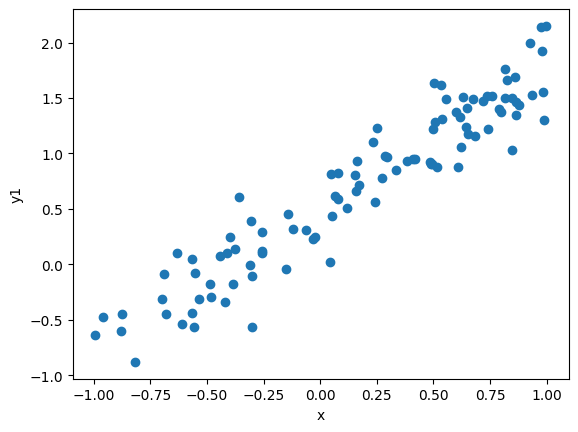

In [4]:
plt.scatter(x, y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.show()
# yes there is a linear relationship between x and y1

Plot `x` against the target variable `y2`.

Do you think there is a linear relationship between `x` and the target?

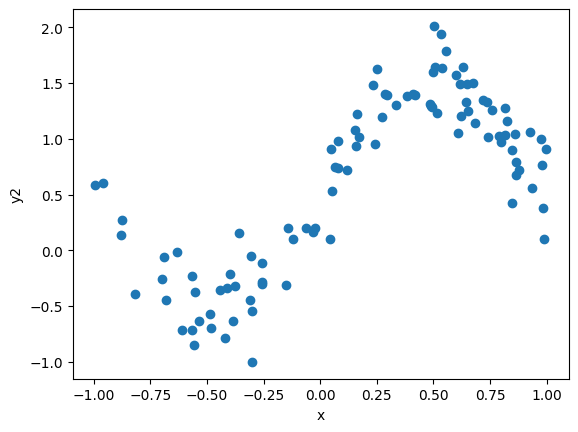

In [5]:
plt.scatter(x, y2)
plt.xlabel('x')
plt.ylabel('y2')
plt.show()
# no there is not a linear relationship between x and y2

### Task 1b

In class you have seen the formula for the Pearson Correlation:
$\rho(a, b) = \frac{\sum_{i = 1}^{m} (a_i - \bar{a})(b_i - \bar{b})}{\sqrt{\sum_{i=1}^{m} (a_i - \bar{a})^2(b_i - \bar{b})^2}} $, where $\bar{a} = \frac{1}{m}\sum_{i=1}^{m} a_i$ and $\bar{b} = \frac{1}{m}\sum_{i=1}^{m} b_i$.

* Compute the Pearson Correlation $\rho$ between `x` and the target `y1`.
* Compute the Pearson Correlation between `x` and `y2`.
* Check that you get the same result as the reference implementation

In [6]:
def p(a, b):
  n = len(a)
  sum_x = float(sum(a))
  sum_y = float(sum(b))
  sum_x_sq = sum(ai*ai for ai in a)
  sum_y_sq = sum(bi*bi for bi in b)
  psum = sum(ai*bi for ai, bi in zip(a, b))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

print(p(x, y1))
print(p(x, y2))    


0.9477423215956917
0.7232525746249457


In [7]:
# Refer to the output of this cell to check whether your implementation of rho
# is correct.

from scipy.stats import pearsonr

print(f"rho(x, y1): {pearsonr(x, y1)[0]:.4f}")
print(f"rho(x, y2): {pearsonr(x, y2)[0]:.4f}")

rho(x, y1): 0.9477
rho(x, y2): 0.7233


## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# Task 2 (3 Points): Univariate Linear Regression

### Task 2a

You will now implement Linear Regression with a single variable. In class you have seen that the underlying model is: $y = \theta_0 + \theta_1x$.
You also derived the maximum likelihood estimates for $\theta_0$ and $\theta_1$:

* $\hat{\theta}_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m}(x_i - \bar{x})^2}$
* $\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}$

In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`
* In the `.fit` method you will have to compute $\hat{\theta}_0$ and $\hat{\theta}_1$.

In [8]:
class UnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y):

    self.theta_1 = np.corrcoef(x, y)[0, 1] * np.std(y) / np.std(x)
    self.theta_0 = np.mean(y) - self.theta_1 * np.mean(x)

    return self

### Task 2b

Fit your linear model to `x` and the target `y1` and plot the resulting residuals.

* Create an instance of the class `UnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`


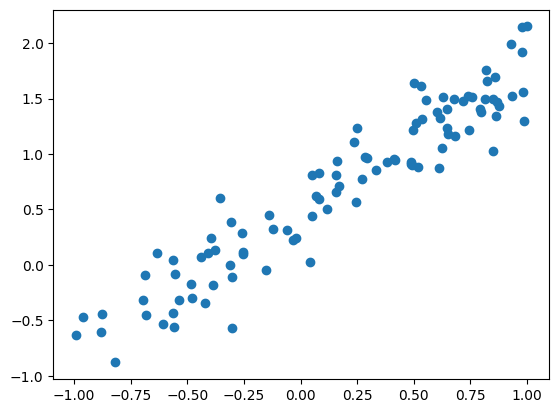

In [9]:
model = UnivariateLinearRegression()
model.fit(x, y1)
model.predict(x)

plt.scatter(x, y1, label='x against y1')

* implement the function `plot_residuals`
* use `plot_residuals` to plot the residuals of your model
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

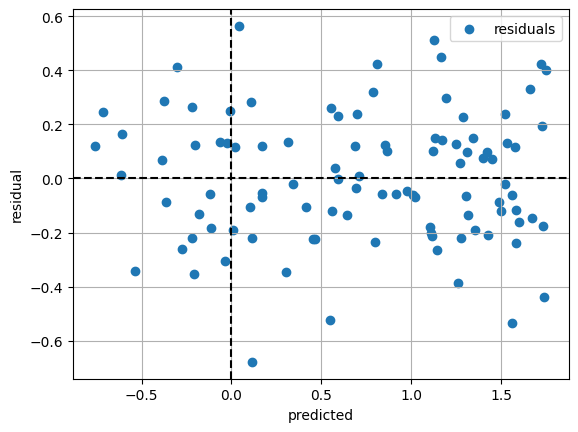

In [10]:
def plot_residuals(y_pred, y_true):
  residuals = y_true - y_pred
  plt.scatter(y_pred, residuals, label='residuals')
  plt.axhline(0, color='black', linestyle='--')
  plt.axvline(0, color='black', linestyle='--')
  plt.xlabel('predicted')
  plt.ylabel('residual')
  plt.legend()
  plt.grid()
  plt.show()

plot_residuals(model.predict(x), y1)


* Fit another linear model to `x` and `y2`
* get the predicted values
* plot the residuals
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

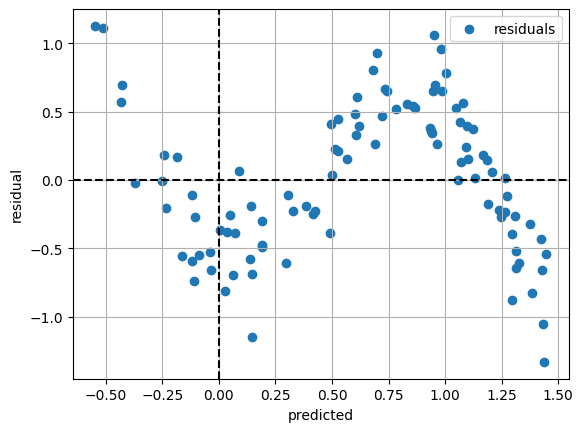

In [11]:
model2 = UnivariateLinearRegression()
model2.fit(x, y2)

plot_residuals(model2.predict(x), y2)

# linearity is not fullfilled, idependence is not fullfilled, normality is not fullfilled, equal variance is fullfilled

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# Task 3 (4 Points): Univariate Linear Regression using Stochastic Gradient Descent

### Task 3a

In class you have seen an alternative version to estimate the parameters $\theta_i$ of the linear regression models by using Gradient Descent.

For the univariate linear regression model, the stochastic gradient descent updates look like this:
* $\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \alpha (\theta_0 + \theta_1 x_t - y_t)$
* $\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \alpha (\theta_0 + \theta_1 x_t - y_t) x_t$

Here $\alpha$ is the learning rate, and $(x_t, y_t)$ is the data point sampled
at time $t$.


In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`.
* In the `.fit` method you will have to implement the update equations for
$\theta_0$ and $\theta_1$.

In [12]:
class SGDUnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.
    self.rng = np.random.default_rng(RANDOM_SEED)

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y, n_iter: int = 100, learning_rate: float = 1.0):
    for t in range(n_iter):
      sample_ix = self.rng.integers(0, len(x))

      xt = x[sample_ix]
      yt = y[sample_ix]

      # TODO: update self.theta_0 and self.theta_1 according to their update equations
      tmpTheta_0 = self.theta_0 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt)
      tmpTheta_1 = self.theta_1 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt) * xt
      self.theta_0 = tmpTheta_0
      self.theta_1 = tmpTheta_1

    return self

### Task 3b

Run SGD for `x` and the target `y1` and compute the mean squared error (MSE).
The MSE is defined as: $\frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$, where
$\hat{y}$ are the model predictions.

* Create an instance of the class `SGDUnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`
* implement the `mse` function
* compute the MSE of your predictions

In [13]:
def mse(y_pred, y_true):
  return np.sum((y_pred - y_true) ** 2) / len(y_pred)

model = SGDUnivariateLinearRegression()
model.fit(x, y1)
model.predict(x)

mse(model.predict(x), y1)

0.23665898370500849

### Task 3c

You will now plot the learning curves for different learning rates $\alpha$.
A learning curves shows how a model's performance changes with increasing number of update steps.
In our case we will plot the model's MSE as a function of the number of update
steps `n_iter` for different values of `learning_rate`.

In the following cell we setup most of the scaffold to create this plot. Follow
the instructions in the comments to finish the plots.

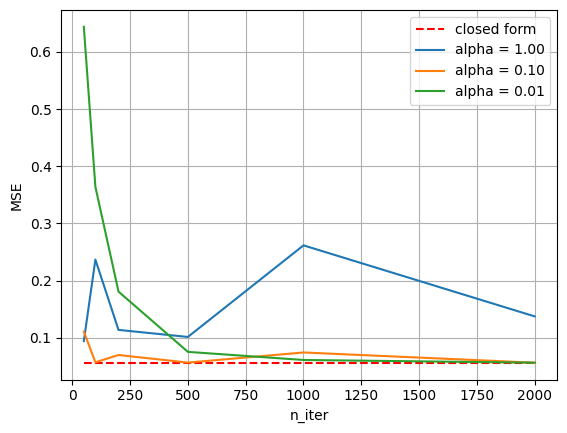

In [14]:
n_iters = [50, 100, 200, 500, 1000, 2000]
learning_rates = [1., .1, .01]

# we plot the MSE achieved by the closed form model as a reference
closed_form = UnivariateLinearRegression()
closed_form.fit(x, y1)
mse_base = mse(y_pred=closed_form.predict(x), y_true=y1)
plt.plot(n_iters, np.ones_like(n_iters) * mse_base, label="closed form", linestyle='--', c='r')
index = 0
for alpha in learning_rates:
  mses = []
  for n_iter in n_iters:
    # fit a SGDUnivariateLinearRegression model using n_iter=n_iter and
    # learning_rate=alpha
    # compute its mse and append the mse value to the mses list
    model = SGDUnivariateLinearRegression()
    model.fit(x, y1, n_iter, alpha)
    y_predict = model.predict(x)
    currMSE = mse(y_predict, y1)

    mse_ = currMSE  # replace with mse calculation
    mses.append(mse_)
  plt.plot(n_iters, mses, label=f"alpha = {alpha:.2f}")

plt.xlabel("n_iter")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

## 📢 **HAND-IN** 📢: A PDF document containing the following:

* the final plot containing learning curves
* a short (2-3 sentences) interpretation of the curves: why do you think they look the way
they do? can you draw any conclusions?

In case you were not able to arrive at the final plot:

* include screenshots of the code you wrote so we can assign partial credit

**Solutions for Tasks 3 and 4 should be in the same document: you will only upload 1 document with your solutions for both tasks!**


# Task 4 (3 Points): Multivariate Linear Regression

In this task we will apply linear regression to non-synthetic data.
The variable `X` is a `pandas` `Dataframe` containing features and `y` contains
the target. Read through the description to get an idea of the different variables.

In [15]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)

X = data['data']
y = data['target']
description = data['DESCR']

print(description)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Task 4a

Implement linear regression using `sklearn`.

* create an instance of the class `sklearn.linear_model.LinearRegression`. Refer to the documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* call its `.fit` method
* get the predicted values with `.predict`
* plot the residuals
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

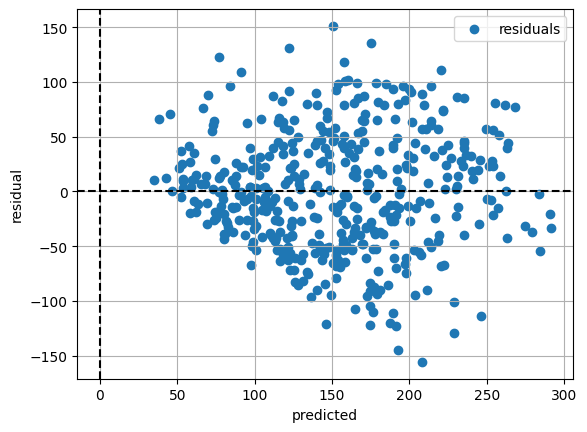

In [16]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression().fit(X, y)
y_pred = sklearn_model.predict(X)
plot_residuals(y_pred, y)

# linearity is fullfilled, independence is fullfilled, normality is fullfilled, equal variance is not fullfilled

### Task 4b

The estimated parameters $\theta$ of the linear model can be found in the `.coef_` member variable. The feature names can be found in the `.feature_names_in_` member variable. They are the same as the names of the columns of `X` and should be in the same order.

Using these, answer the following questions:

* Which are the 3 most influential features?
* How do you interpret the sign of the coefficients?
* If you had to exclude 1 feature, which one would you select and why?

In [17]:
print(f"Feature\tCoefficient")
for i in zip(sklearn_model.coef_, sklearn_model.feature_names_in_):
    print(f"{i[1]}\t{i[0]:.2f}")
print()
absCoef = np.abs(sklearn_model.coef_)
sortedCoef = np.sort(absCoef)
sortedCoef = sortedCoef[::-1]
print("Absolute and sorted:", sortedCoef)



Feature	Coefficient
age	-10.01
sex	-239.82
bmi	519.85
bp	324.38
s1	-792.18
s2	476.74
s3	101.04
s4	177.06
s5	751.27
s6	67.63

Absolute and sorted: [792.17563855 751.27369956 519.84592005 476.73902101 324.3846455
 239.81564367 177.06323767 101.04326794  67.62669218  10.0098663 ]


## 📢 **HAND-IN** 📢: A PDF document containing the following:

* your residual plot
* a short (2-3 sentences) interpretation of the residuals. In particular, your
assessment of the 4 basic assumptions.
* your answers to the questions in Task 4b

**Solutions for Tasks 3 and 4 should be in the same document: you will only upload 1 document with your solutions for both tasks!**
